<a href="https://colab.research.google.com/github/adnanhussain8082/ml/blob/main/52RegressionMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [6]:
df=pd.read_csv('placement.csv')

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in LPA)')

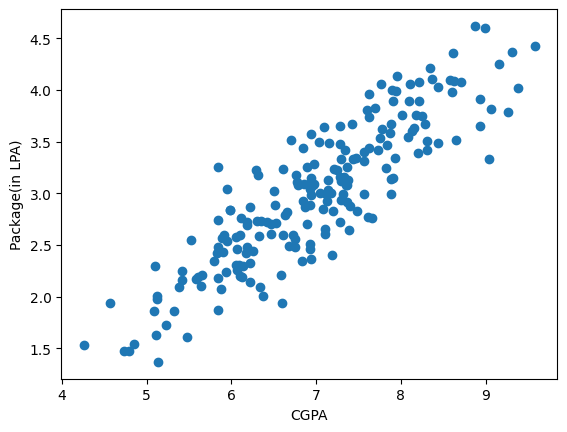

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [7]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [ ]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [ ]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [ ]:
# lr.predict(x_test.iloc[0].values.reshape(1,1))
lr.predict(x_test.iloc[[1]])  # Using double brackets to keep as a DataFrame

array([3.09324469])

Text(0, 0.5, 'Package(in LPA)')

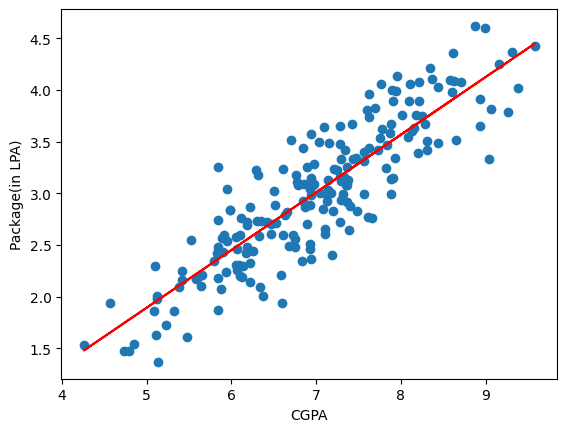

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [12]:
#slope
m=lr.coef_

In [13]:
# y-intercept
c=lr.intercept_

In [14]:
# y=mx+c

m*8.58+c  # package for a student with 8.58 cgpa(this is how is algo works bts using this equation of st line to find a line that best fits the given data and then make predictions out of it)

array([3.89111601])

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [13]:
y_pred = lr.predict(x_test)

In [17]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [14]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [15]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [16]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [17]:
print("r2 score",r2_score(y_test,y_pred))

r2 score 0.780730147510384


In [18]:
r2 = r2_score(y_test,y_pred)

In [25]:
x_test.shape

(40, 1)

In [19]:
#adjusted r2 score
1 - ((1-r2)*(40-1)/(40-1-1) )

0.7749598882343415

In [21]:
#now adding a random feature to see the changes on r2 score

new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.771301,3.26
1,5.12,0.452206,1.98
2,7.82,0.284966,3.25
3,7.42,0.633578,3.67
4,6.94,0.397064,3.57


Text(0, 0.5, 'package')

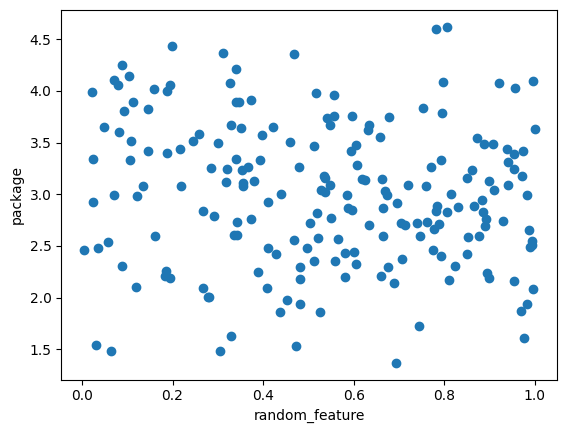

In [22]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package')
#the below given graph shows that random_feature data is completely related(completely random or
#there is no pattern) and is not in any way related to the package

In [23]:
x = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
lr=LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(x_test)

In [28]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7771458757043064


In [29]:
#adjusted r2 score
1 - ((1-r2)*(40-1)/(40-1-2))

0.7650997068234581

In [31]:
#now seeing the behaviour of r2_score when iq col is added which has a sort of linear relation with package

new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [32]:
new_df2.sample(5)

,cgpa,iq,package
36,5.99,3.84,2.84
13,6.93,3.59,2.89
68,7.56,3.89,2.99
199,6.22,1.23,2.33
69,7.30,3.54,2.94


Text(0, 0.5, 'package')

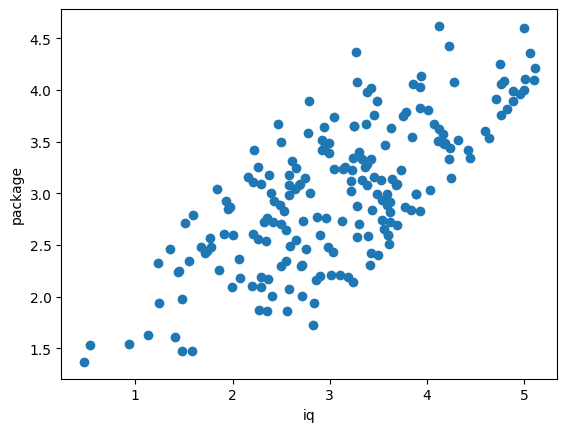

In [33]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package')

In [34]:
x = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
lr=LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(x_test)

In [39]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.80475888816112


In [40]:
#adjusted r2 score
1 - ((1-r2)*(40-1)/(40-1-2))

0.7942053145482075